In [2]:
import os
import os.path
import numpy as np
import matplotlib.pyplot as plt
import mne
import pandas as pd
from scipy import stats
import seaborn as sns

In [3]:
#Path des fichiers csv
folder_path ='/Users/FlorianLudwig/Desktop/workshop_eeg/trust-eeg/'

trust_temp_file_path=folder_path+'trust_temp.csv'
distrust_temp_file_path=folder_path+'distrust_temp.csv'
betrayal_temp_file_path=folder_path+'betrayal_temp.csv'

#Transformation des csv en pandas dataframe
df_trust_temp = pd.read_csv(trust_temp_file_path)
df_distrust_temp = pd.read_csv(distrust_temp_file_path)
df_betrayal_temp = pd.read_csv(betrayal_temp_file_path)

#Transformation du pandas dataframe en numpy array
trust_temp = df_trust_temp.to_numpy()
distrust_temp = df_distrust_temp.to_numpy()
betrayal_temp = df_betrayal_temp.to_numpy()

In [4]:
print(trust_temp.shape)
print(distrust_temp.shape)
print(betrayal_temp.shape)
print(trust_temp[59].size)

(60, 1502)
(60, 1502)
(60, 1502)
1502


In [5]:
#Construction du Cube Trust
trust_temp_sub = np.array_split(trust_temp, 15)
trust_temp_sub_mat = np.stack((trust_temp_sub),axis=0)
print('Trust Cube stats: '+str(trust_temp_sub_mat.shape))

#Construction du Cube Betrayal
betrayal_temp_sub = np.array_split(betrayal_temp, 15)
betrayal_temp_sub_mat = np.stack((betrayal_temp_sub),axis=0)
print(betrayal_temp_sub_mat.shape)



Trust Cube stats: (15, 4, 1502)
(15, 4, 1502)


In [6]:
#Construction d'une info pour l'evoked
ch_names = ['Oz','Cz','Fz','Pz']
sfreq = 1000
info = mne.create_info(ch_names, sfreq, ch_types='eeg', verbose=None)

print(trust_temp_sub_mat.shape)
#Construction de l'evoked pour l'image moyenne
trust_temp_sub_mat_avg = trust_temp_sub_mat.mean(axis=0)
print('Mean for participants pour Evoked: '+ str(trust_temp_sub_mat_avg.shape))

#Conversion en Evoked Temporels
trust_temp_sub_mat_evoked = mne.EvokedArray(trust_temp_sub_mat_avg, info, nave=150) 
"betrayal_evoked = mne.EvokedArray(betrayal_temp,info)";


(15, 4, 1502)
Mean for participants pour Evoked: (4, 1502)


In [7]:
#Découpage de la zone d'intérêt

#P300
trust_temp_sub_mat_crop_P300 = trust_temp_sub_mat[:,:,625:675]
print('Shape après crop: ' + str(trust_temp_sub_mat_crop_P300.shape))
betrayal_temp_sub_mat_crop_P300 = betrayal_temp_sub_mat[:,:,625:675]

#FRN
trust_temp_sub_ERN = trust_temp_sub_mat[:,:,540:575]
betrayal_temp_sub_ERN = betrayal_temp_sub_mat[:,:,540:575]
print('Shape après crop: ' + str(trust_temp_sub_ERN.shape))

Shape après crop: (15, 4, 50)
Shape après crop: (15, 4, 35)


In [8]:
#ERN

#Moyenne du signal sur la zone d'intérêt
trust_temp_sub_mat_avg_ERN = trust_temp_sub_ERN.mean(axis=2)
print(('Shape après moyenne: '+ str(trust_temp_sub_ERN.shape)))
betrayal_temp_sub_mat_avg_ERN = betrayal_temp_sub_ERN.mean(axis=2)

#Découpage par chaîne
ERP_Oz_Trust_ERN = trust_temp_sub_mat_avg_ERN[:,0]
ERP_Cz_Trust_ERN = trust_temp_sub_mat_avg_ERN[:,1]
ERP_Fz_Trust_ERN = trust_temp_sub_mat_avg_ERN[:,2]
ERP_Pz_Trust_ERN = trust_temp_sub_mat_avg_ERN[:,3]
ERP_Oz_Betrayal_ERN = betrayal_temp_sub_mat_avg_ERN[:,0]
ERP_Cz_Betrayal_ERN = betrayal_temp_sub_mat_avg_ERN[:,1]
ERP_Fz_Betrayal_ERN = betrayal_temp_sub_mat_avg_ERN[:,2]
ERP_Pz_Betrayal_ERN = betrayal_temp_sub_mat_avg_ERN[:,3]

Shape après moyenne: (15, 4, 35)


In [9]:
#P300

#Moyenne du signal sur la zone d'intérêt
trust_temp_sub_mat_avg_P300 = trust_temp_sub_mat_crop_P300.mean(axis=2)
print(('Shape après moyenne: '+ str(trust_temp_sub_mat_avg_P300.shape)))
betrayal_temp_sub_mat_avg_P300 = betrayal_temp_sub_mat_crop_P300.mean(axis=2)

#Découpage par chaîne Oz
ERP_Oz_Trust_P300 = trust_temp_sub_mat_avg_P300[:,0]
print('Shape pour une seule chaîne: ' + str(trust_temp_sub_mat_avg_P300[:,0].shape))
ERP_Oz_Betrayal_P300 = betrayal_temp_sub_mat_avg_P300[:,0]

#Même procédure pour Cz, Fz, Pz
ERP_Cz_Trust_P300 = trust_temp_sub_mat_avg_P300[:,1]
ERP_Fz_Trust_P300 = trust_temp_sub_mat_avg_P300[:,2]
ERP_Pz_Trust_P300 = trust_temp_sub_mat_avg_P300[:,3]

ERP_Cz_Betrayal_P300 = betrayal_temp_sub_mat_avg_P300[:,1]
ERP_Fz_Betrayal_P300 = betrayal_temp_sub_mat_avg_P300[:,2]
ERP_Pz_Betrayal_P300 = betrayal_temp_sub_mat_avg_P300[:,3]

Shape après moyenne: (15, 4)
Shape pour une seule chaîne: (15,)


In [10]:
#T-test P300

print("This is a test for the null hypothesis that two related or repeated samples have identical average.\n")
#Find T critical value - Right tailed
df_P300 = ERP_Pz_Betrayal_P300.size - 1
print("T-critical Value: " + str(stats.t.ppf(q=1-.05,df=df_P300)))
print("\nIf the absolute value of the t-value is greater than the critical value, you reject the null hypothesis. \nIf the absolute value of the t-value is less than the critical value, you fail to reject the null hypothesis.\n")
print("T-test Oz: " + str(stats.ttest_rel(ERP_Oz_Betrayal_P300,ERP_Oz_Trust_P300)))
print("\nT-test Cz: " + str(stats.ttest_rel(ERP_Cz_Betrayal_P300,ERP_Cz_Trust_P300)))
print("\nT-test Fz: " + str(stats.ttest_rel(ERP_Fz_Betrayal_P300, ERP_Fz_Trust_P300)))
print("\nT-test Pz: " + str(stats.ttest_rel(ERP_Pz_Betrayal_P300, ERP_Pz_Trust_P300)))

This is a test for the null hypothesis that two related or repeated samples have identical average.

T-critical Value: 1.7613101357748562

If the absolute value of the t-value is greater than the critical value, you reject the null hypothesis. 
If the absolute value of the t-value is less than the critical value, you fail to reject the null hypothesis.

T-test Oz: Ttest_relResult(statistic=0.22912809109638801, pvalue=0.8220827846395931)

T-test Cz: Ttest_relResult(statistic=0.06520276939443845, pvalue=0.9489344724561432)

T-test Fz: Ttest_relResult(statistic=0.23656945179947175, pvalue=0.8164170958982166)

T-test Pz: Ttest_relResult(statistic=0.708458603483695, pvalue=0.4902894293538046)


In [11]:
#T-test ERN

print("This is a test for the null hypothesis that two related or repeated samples have identical average.\n")
#Find T critical value - Right tailed
df_ERN = ERP_Pz_Betrayal_ERN.size - 1
print("T-critical Value: " + str(stats.t.ppf(q=1-.05,df=df_ERN)))
print("\nIf the absolute value of the t-value is greater than the critical value, you reject the null hypothesis. \nIf the absolute value of the t-value is less than the critical value, you fail to reject the null hypothesis.\n")
print("T-test Oz: " + str(stats.ttest_rel(ERP_Oz_Betrayal_ERN,ERP_Oz_Trust_ERN)))
print("\nT-test Cz: " + str(stats.ttest_rel(ERP_Cz_Betrayal_ERN,ERP_Cz_Trust_ERN)))
print("\nT-test Fz: " + str(stats.ttest_rel(ERP_Fz_Betrayal_ERN, ERP_Fz_Trust_ERN)))
print("\nT-test Pz: " + str(stats.ttest_rel(ERP_Pz_Betrayal_ERN, ERP_Pz_Trust_ERN)))

This is a test for the null hypothesis that two related or repeated samples have identical average.

T-critical Value: 1.7613101357748562

If the absolute value of the t-value is greater than the critical value, you reject the null hypothesis. 
If the absolute value of the t-value is less than the critical value, you fail to reject the null hypothesis.

T-test Oz: Ttest_relResult(statistic=-1.3502874342180535, pvalue=0.1983494371433774)

T-test Cz: Ttest_relResult(statistic=-1.4294290265376168, pvalue=0.17481507180353734)

T-test Fz: Ttest_relResult(statistic=-1.6113811877646274, pvalue=0.12940494477817416)

T-test Pz: Ttest_relResult(statistic=-1.5705813639650223, pvalue=0.13860026058995722)


In [12]:
#Dataframes P300

print(ERP_Oz_Trust_P300.shape)
df_Oz_trust = pd.DataFrame(ERP_Oz_Trust_P300, columns=['value']).assign(condition ='trust',channel='Oz')
df_Oz_betrayal = pd.DataFrame(ERP_Oz_Betrayal_P300, columns=['value']).assign(condition ='betrayal',channel='Oz')
df_Fz_trust = pd.DataFrame(ERP_Fz_Trust_P300, columns=['value']).assign(condition ='trust',channel='Fz')
df_Fz_betrayal = pd.DataFrame(ERP_Fz_Betrayal_P300, columns=['value']).assign(condition ='betrayal',channel='Fz')
df_Pz_trust = pd.DataFrame(ERP_Pz_Trust_P300, columns=['value']).assign(condition ='trust',channel='Pz')
df_Pz_betrayal = pd.DataFrame(ERP_Pz_Betrayal_P300, columns=['value']).assign(condition ='betrayal',channel='Pz')
df_Cz_trust = pd.DataFrame(ERP_Cz_Trust_P300, columns=['value']).assign(condition ='trust',channel='Cz')
df_Cz_betrayal = pd.DataFrame(ERP_Cz_Betrayal_P300, columns=['value']).assign(condition ='betrayal',channel='Cz')

(15,)


In [13]:
#Dataframes ERN

print(ERP_Oz_Trust_ERN.shape)
df_Oz_trust_ERN = pd.DataFrame(ERP_Oz_Trust_ERN, columns=['value']).assign(condition ='trust',channel='Oz')
df_Oz_betrayal_ERN = pd.DataFrame(ERP_Oz_Betrayal_ERN, columns=['value']).assign(condition ='betrayal',channel='Oz')
df_Fz_trust_ERN = pd.DataFrame(ERP_Fz_Trust_ERN, columns=['value']).assign(condition ='trust',channel='Fz')
df_Fz_betrayal_ERN = pd.DataFrame(ERP_Fz_Betrayal_ERN, columns=['value']).assign(condition ='betrayal',channel='Fz')
df_Pz_trust_ERN = pd.DataFrame(ERP_Pz_Trust_ERN, columns=['value']).assign(condition ='trust',channel='Pz')
df_Pz_betrayal_ERN = pd.DataFrame(ERP_Pz_Betrayal_ERN, columns=['value']).assign(condition ='betrayal',channel='Pz')
df_Cz_trust_ERN = pd.DataFrame(ERP_Cz_Trust_ERN, columns=['value']).assign(condition ='trust',channel='Cz')
df_Cz_betrayal_ERN = pd.DataFrame(ERP_Cz_Betrayal_ERN, columns=['value']).assign(condition ='betrayal',channel='Cz')

(15,)


In [14]:
cdf_P300 = pd.concat([df_Oz_trust, df_Oz_betrayal,df_Fz_trust,df_Fz_betrayal,df_Pz_trust,df_Pz_betrayal,df_Cz_trust,df_Cz_betrayal])
print(cdf_P300)

cdf_ERN = pd.concat([df_Oz_trust_ERN,df_Oz_betrayal,df_Fz_trust_ERN,df_Fz_betrayal_ERN,df_Pz_trust_ERN,df_Pz_betrayal_ERN,df_Cz_trust_ERN,df_Cz_betrayal_ERN])
print(cdf_ERN)


           value condition channel
0   1.750614e-05     trust      Oz
1   4.368153e-06     trust      Oz
2  -5.617900e-05     trust      Oz
3   4.703751e-05     trust      Oz
4   4.185214e-06     trust      Oz
..           ...       ...     ...
10 -5.213210e-06  betrayal      Cz
11  1.348468e-05  betrayal      Cz
12  1.733748e-07  betrayal      Cz
13  5.627661e-06  betrayal      Cz
14  4.798973e-06  betrayal      Cz

[120 rows x 3 columns]
           value condition channel
0   8.030815e-07     trust      Oz
1  -5.060318e-06     trust      Oz
2   5.974071e-05     trust      Oz
3   2.145271e-05     trust      Oz
4  -4.190596e-06     trust      Oz
..           ...       ...     ...
10 -2.145208e-06  betrayal      Cz
11 -1.125041e-06  betrayal      Cz
12 -3.653110e-06  betrayal      Cz
13  3.611331e-06  betrayal      Cz
14  1.462667e-06  betrayal      Cz

[120 rows x 3 columns]


In [15]:
cdf_P300.loc[:,'value'] *= 100000
cdf_ERN.loc[:,'value'] *= 100000

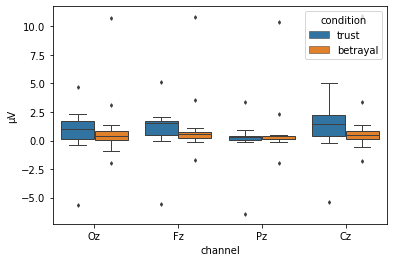

In [24]:
ax_1 = sns.boxplot(x="channel", y="value", hue="condition", data=cdf_P300, fliersize=2.5, linewidth=1)  # RUN PLOT   
ax_1.set(ylabel = '\u03BCV')
ax_1.set_ylabel 
plt.savefig("results_P300.png",dpi=300)
plt.show()

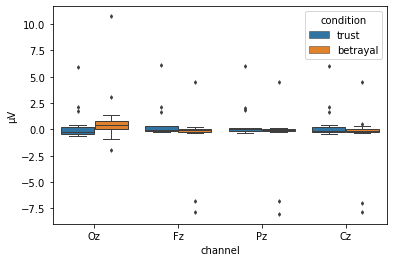

In [27]:
ax_2 = sns.boxplot(x="channel", y="value", hue="condition", data=cdf_ERN, fliersize=2.5, linewidth=1)  # RUN PLOT   
ax_2.set(ylabel = '\u03BCV')
ax_2.set_ylabel
plt.savefig("results_ERN.png",dpi=300)
plt.show()